In [1]:
import np as np

import Ramsey_ExperimentV3
from tqdm import tqdm
import random

import estimator
import numpy as np

In [9]:
fitted_data = []
T = 1 * np.pi
uni_delay = np.linspace(0, T, 20)
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []

repetitions = 100
# W =]
W = np.arange(0.001, 3.1, 0.25)
# np.delete(W, 0)
Decay = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]
for rep in tqdm(range(repetitions), desc="Repetition"):
    rep_decay_fit = []
    for w in W:
        # Create experiments
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(
            n, shots, delay, Decay, [w], J
        )
        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, Decay, [w], J)
        batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni = Ramsey_ExperimentV3.ramsey_local(
            n, shots, uni_delay, Decay, [w], J
        )

        # Append batches and decay to decay fit list
        rep_decay_fit.append((
            w,
            (batch_x_det, batch_y_det, batch_x_cross, batch_y_cross),
            (batch_det, batch_cross),
            (batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni),
        ))

    decay_fit.append(rep_decay_fit)

Repetition: 100%|██████████| 100/100 [00:59<00:00,  1.68it/s]


In [10]:

from importlib import reload
reload(estimator)

<module 'estimator' from 'C:\\Projects\\Crosstalk\\estimator.py'>

In [11]:
# #load from pickle
# with open('decay_fit.pkl', 'rb') as f:
#     decay_fit = pkl.load(f)
for rep, rep_batches in enumerate(decay_fit):
    rep_fits = []
    print(f"Repetition {rep} / {repetitions}")
    for w, (batch_x_det, batch_y_det, batch_x_cross, batch_y_cross), (batch_det, batch_cross), (batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni) in rep_batches:
        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross, batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)
        Decay_uni, W_uni, J_uni = estimator.one_by_one_fit(batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni)

        rep_fits.append((
            w,
            (Decay_local, W_local, J_local),
            (Decay_fisher, W_fisher, J_fisher),
            (Decay_uni, W_uni, J_uni),
        ))

    fitted_data.append(rep_fits)

C:\Projects\Crosstalk\estimator.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
C:\Projects\Crosstalk\estimator.py:66: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)


Repetition 0 / 100
Repetition 1 / 100
Repetition 2 / 100
Repetition 3 / 100
Repetition 4 / 100
Repetition 5 / 100
Repetition 6 / 100
Repetition 7 / 100
Repetition 8 / 100
Repetition 9 / 100
Repetition 10 / 100
Repetition 11 / 100
Repetition 12 / 100
Repetition 13 / 100
Repetition 14 / 100
Repetition 15 / 100
Repetition 16 / 100
Repetition 17 / 100
Repetition 18 / 100
Repetition 19 / 100
Repetition 20 / 100
Repetition 21 / 100
Repetition 22 / 100
Repetition 23 / 100
Repetition 24 / 100
Repetition 25 / 100
Repetition 26 / 100
Repetition 27 / 100
Repetition 28 / 100
Repetition 29 / 100
Repetition 30 / 100
Repetition 31 / 100
Repetition 32 / 100
Repetition 33 / 100
Repetition 34 / 100
Repetition 35 / 100
Repetition 36 / 100
Repetition 37 / 100
Repetition 38 / 100
Repetition 39 / 100
Repetition 40 / 100
Repetition 41 / 100
Repetition 42 / 100
Repetition 43 / 100
Repetition 44 / 100
Repetition 45 / 100
Repetition 46 / 100
Repetition 47 / 100
Repetition 48 / 100
Repetition 49 / 100
Repetition

In [16]:
from importlib import reload
reload(estimator)
for rep, rep_fits in enumerate(fitted_data):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []

    for w, (Decay_local, W_local, J_local), (Decay_fisher, W_fisher, J_fisher), (Decay_uni, W_uni, J_uni) in rep_fits:
        fisher_errors = estimator.percent_error(
            np.concatenate([[w], Decay, J_list]),
            np.concatenate([W_fisher, Decay_fisher, J_fisher])
        )
        local_errors = estimator.percent_error(
            np.concatenate([[w], Decay, J_list]),
            np.concatenate([W_local, Decay_local, J_local])
        )

        for error in fisher_errors:
            if error > 2 and w < 2.8 and w > 0.1:
                print(f"Decay: {w}, fitted_decay: {Decay_fisher} , error: {error}")
        uniform_errors = estimator.percent_error(
            np.concatenate([[w], Decay, J_list]),
            np.concatenate([W_uni, Decay_uni, J_uni])
        )

        rep_error_fisher.append(fisher_errors)
        rep_error_local.append(local_errors)
        rep_error_uniform.append(uniform_errors)

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    uniform_local.append(rep_error_uniform)



Decay: 2.751, fitted_decay: [3.62609182] , error: 7.567853172805059
Decay: 2.751, fitted_decay: [3.62609182] , error: 6.896358242160559
Decay: 2.751, fitted_decay: [3.44626499] , error: 7.568000999842216
Decay: 2.751, fitted_decay: [3.44626499] , error: 5.984212409321042
Decay: 2.501, fitted_decay: [2.83886724] , error: 3.381432708952323
Decay: 2.751, fitted_decay: [2.78217832] , error: 7.568001
Decay: 2.751, fitted_decay: [2.78217832] , error: 3.1761595722846017
Decay: 2.751, fitted_decay: [4.42814999] , error: 7.568000588574849
Decay: 2.751, fitted_decay: [4.42814999] , error: 11.752212334682888
Decay: 2.501, fitted_decay: [2.93396746] , error: 3.7402301383012895
Decay: 2.751, fitted_decay: [4.0123182] , error: 7.568000698652417
Decay: 2.751, fitted_decay: [4.0123182] , error: 9.074060916035183
Decay: 2.501, fitted_decay: [2.86489582] , error: 6.255000999854882
Decay: 2.501, fitted_decay: [2.86489582] , error: 3.477836427293761
Decay: 2.751, fitted_decay: [2.64649994] , error: 7.5680

In [17]:
k = 10

errors_fisher_reshaped = np.array(errors_fisher).transpose()
errors_local_reshaped = np.array(errors_local).transpose()
errors_uniform_reshaped = np.array(uniform_local).transpose()

# errors_local_reshaped = list(map(list, zip(*errors_local)))
# errors_uniform_reshaped = list(map(list, zip(*uniform_local)))
# errors_fisher_reshaped_G = list(map(list, zip(*uniform_local_G)))

errors_fisher_reshaped_a = errors_fisher_reshaped[1]
errors_local_reshaped_a = errors_local_reshaped[1]
errors_uniform_reshaped_a = errors_uniform_reshaped[1]

errors_fisher_reshaped_w = errors_fisher_reshaped[0]
errors_local_reshaped_w = errors_local_reshaped[0]
errors_uniform_reshaped_w = errors_uniform_reshaped[0]


# errors_fisher_median_a, errors_fisher_std_a = np.sqrt(np.mean(errors_fisher_reshaped_a, axis=1)), np.std(errors_fisher_reshaped_a, axis=1)
#
#
errors_fisher_median_a, errors_fisher_std_a = estimator.mean_of_medians(errors_fisher_reshaped_a, k)
errors_local_median_a, errors_local_std_a = estimator.mean_of_medians(errors_local_reshaped_a, k)
errors_uniform_median_a, errors_uniform_std_a = estimator.mean_of_medians(errors_uniform_reshaped_a, k)

errors_fisher_median_w, errors_fisher_std_w = estimator.mean_of_medians(errors_fisher_reshaped_w, k)
errors_local_median_w, errors_local_std_w = estimator.mean_of_medians(errors_local_reshaped_w, k)
errors_uniform_median_w, errors_uniform_std_w = estimator.mean_of_medians(errors_uniform_reshaped_w, k)

# errors_uniform_median_G, errors_uniform_std_G = estimator.mean_of_medians(errors_fisher_reshaped_G, k)
print()

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)

plt.errorbar(W, np.array(errors_uniform_median_a), yerr= np.array(errors_uniform_std_a),
             fmt='o', color='blue')
plt.errorbar(W, np.array(errors_fisher_median_a), yerr= np.array(errors_fisher_std_a),
             fmt='o', color='red')
plt.errorbar(W, np.array(errors_local_median_a), yerr= np.array(errors_local_std_a), fmt='o',
             color='green')






plt.title("Dephasing")
# plt.title(f'Shots={Decay} ')
# plt.xlabel('$\omega')
# plt.ylabel('mean / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2])
plt.grid()
plt.legend()

NameError: name 'W' is not defined

<Figure size 1000x400 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_24992\2499529888.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


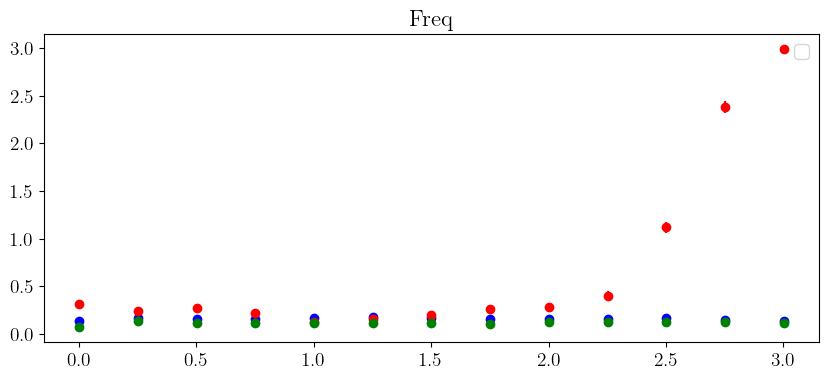

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)

plt.errorbar(W,  np.array(errors_uniform_median_w), yerr= np.array(errors_uniform_std_w),
             fmt='o', color='blue')
plt.errorbar(W,  np.array(errors_fisher_median_w), yerr= np.array(errors_fisher_std_w),
             fmt='o', color='red')
plt.errorbar(W,  np.array(errors_local_median_w), yerr= np.array(errors_local_std_w), fmt='o',
             color='green')
# plt.errorbar(Decay, 100 * np.array(errors_uniform_median_G/Decay ), yerr=100 * np.array(errors_uniform_std_G/Decay ), fmt='o',
#              color='magenta')
# Scatter points for 75th percentiles
plt.title("Freq")

# plt.title(f'Shots={Decay} ')
# plt.xlabel('$\omega')
# plt.ylabel('mean / $\omega$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2])
# plt.ylim([0,50])
plt.grid()

plt.legend()

Decay:  1.501
mean:  18.54041889923911
median:  14.700793648444346


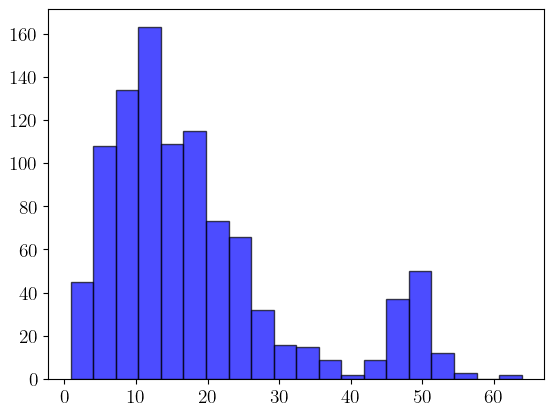

In [356]:
index = 6
X = np.array(100 * np.array(np.sqrt(errors_fisher_reshaped_a)))[index][:1000]
# print("Decay: ",Decay[index])
# print(X)
#plot histogram with 10 bins
plt.hist(X, bins=20, color='blue', edgecolor='black', alpha=0.7)
# q75, q25 = np.percentile(X, [75, 25])
# iqr = q75 - q25
print("Decay: ", Decay[index])
print("mean: ", np.mean(X))
print("median: ", np.median(X))
# print("IQR: ", iqr)
# print("std: ", np.std(X))

In [22]:
import os
import pandas as pd
user_home = os.path.expanduser("~")

results_df = pd.DataFrame({
    "shots": shots,
    "W": W,
    "errors_fisher_median_w": errors_fisher_median_w,
    "errors_fisher_std_w": errors_fisher_std_w,
    "errors_local_median_w": errors_local_median_w,
    "errors_local_std_w": errors_local_std_w,
    "errors_uniform_median_w": errors_uniform_median_w,
    "errors_uniform_std_w": errors_uniform_std_w,
})

# Saving to Excel
results_df.to_excel(user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-detuning_w.xlsx',
    index=False)

results_df = pd.DataFrame({
    "shots": shots,
    "W": W,
    "errors_fisher_median_a": errors_fisher_median_a,
    "errors_fisher_std_a": errors_fisher_std_a,
    "errors_local_median_a": errors_local_median_a,
    "errors_local_std_a": errors_local_std_a,
    "errors_uniform_median_a": errors_uniform_median_a,
    "errors_uniform_std_a": errors_uniform_std_a,
})

# Saving to Excel
results_df.to_excel(
    user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-detuning_a.xlsx',
    index=False)

In [32]:
fisher_a = []
local_a = []
uniform_a = []

fisher_w = []
local_w = []
uniform_w = []

for rep, rep_fits in enumerate(fitted_data):
    # Initialize lists for this repetition
    rep_fisher_a = []
    rep_local_a = []
    rep_uniform_a = []

    rep_fisher_w = []
    rep_local_w = []
    rep_uniform_w = []

    for w, (Decay_local, W_local, J_local), (Decay_fisher, W_fisher, J_fisher), (Decay_uni, W_uni, J_uni) in rep_fits:
        # Append decays
        rep_fisher_a.append(Decay_fisher)
        rep_local_a.append(Decay_local)
        rep_uniform_a.append(Decay_uni)

        # Append weights
        rep_fisher_w.append(W_fisher)
        rep_local_w.append(W_local)
        rep_uniform_w.append(W_uni)

    # Calculate means for this repetition
    fisher_a.append(rep_fisher_a)
    local_a.append(rep_local_a)
    uniform_a.append(rep_uniform_a)

    fisher_w.append(rep_fisher_w)
    local_w.append(rep_local_w)
    uniform_w.append(rep_uniform_w)



fisher_a = np.array(fisher_a).transpose()[0]
local_a = np.array(local_a).transpose()[0]
uniform_a = np.array(uniform_a).transpose()[0]



fisher_w= np.array(fisher_w).transpose()[0]
local_w = np.array(local_w).transpose()[0]
uniform_w = np.array(uniform_w).transpose()[0]

fisher_a_mean = [np.mean(fisher_a[i]) for i in range(len(W))]
fisher_a_std = [np.std(fisher_a[i]) for i in range(len(W))]

local_a_mean = [np.mean(local_a[i]) for i in range(len(W))]
local_a_std = [np.std(local_a[i])  for i in range(len(W))]

uniform_a_mean = [np.mean(uniform_a[i]) for i in range(len(W))]
uniform_a_std = [np.std(uniform_a[i])  for i in range(len(W))]


fisher_w_mean = [np.mean(fisher_w[i]) for i in range(len(W))]
fisher_w_std = [np.std(fisher_w[i])  for i in range(len(W))]

local_w_mean = [np.mean(local_w[i]) for i in range(len(W))]
local_w_std = [np.std(local_w[i])  for i in range(len(W))]

uniform_w_mean = [np.mean(uniform_w[i]) for i in range(len(W))]
uniform_w_std = [np.std(uniform_w[i]) for i in range(len(W))]





# print("Fisher_a: ", len(fisher_a))

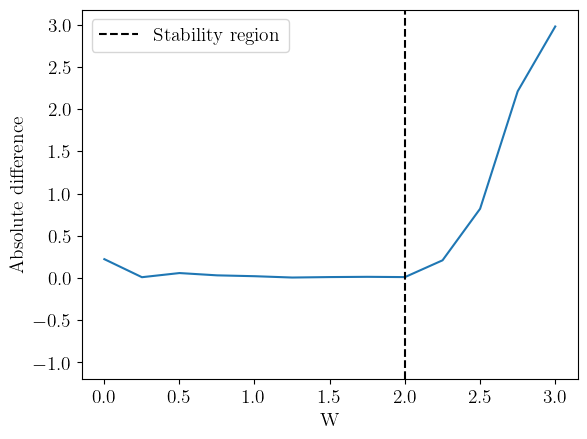

In [35]:
# plt.plot(Decay,decay_fit_t_mean,label='fit')
# plt.scatter(Decay, fisher_a_mean, label='param')
plt.plot(W, (np.abs(fisher_w_mean-W)))
plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
# plt.errorbar(Decay, Decay/fisher_a_mean, yerr=fisher_a_std, label='param')
# plt.ylim([-0.5, 0.5])
plt.xlabel('W')
plt.ylabel('Absolute difference')
plt.legend()

In [36]:
import os
import pandas as pd
user_home = os.path.expanduser("~")

results_df = pd.DataFrame({
    "shots": shots,
    "W": W,
    "fisher_a_mean": fisher_a_mean,
    "fisher_a_std": fisher_a_std,
    "local_a_mean": local_a_mean,
    "local_a_std": local_a_std,
    "uniform_a_mean": uniform_a_mean,
    "uniform_a_std": uniform_a_std,
    "fisher_w_mean": fisher_w_mean,
    "fisher_w_std": fisher_w_std,
    "local_w_mean": local_w_mean,
    "local_w_std": local_w_std,
    "uniform_w_mean": uniform_w_mean,
    "uniform_w_std": uniform_w_std,
})

# Saving to Excel
results_df.to_excel(user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\Unbiased_estimator_detuning.xlsx',
    index=False)


In [ ]:
# plt.plot(Decay,omega_fit_t_mean,label='fit')
plt.plot(Decay, [1] * len(Decay))
plt.errorbar(Decay, omega_fit_t_mean, yerr=omega_fit_t_std, label='std')

In [ ]:
from tqdm import tqdm
import random

T = 1 * np.pi
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []

repetitions = 100
# W =]
Decay = np.arange(0.001, 4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_Decay_fisher = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, delay,
                                                                                                  [decay],
                                                                                                  W, J)
        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)
        # batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        # Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        rep_Decay_fisher.append(Decay_local)
    decay_fit.append(rep_Decay_fisher)



In [ ]:
import matplotlib.pyplot as plt
decay_fit_t = np.array(decay_fit).transpose()[0]
decay_fit_t_mean = [np.mean(decay_fit_t[i]) for i in range(len(Decay))]
decay_fit_t_std = [np.std(decay_fit_t[i]) / np.sqrt(repetitions) for i in range(len(Decay))]

# plt.plot(Decay,decay_fit_t_mean,label='fit')
plt.plot(Decay, Decay)
plt.errorbar(Decay, decay_fit_t_mean, yerr=decay_fit_t_std, label='std')
plt.legend()